# Online Technical Appendix
### Author: Isak Jones
### University: New York University
### Professor: David Denoon
### Course: American Empire?
### Date: May 10th, 2021

In this online technical appendix, I provide all the data and code used to generate the analysis presented in the paper. Code cells pertain to the paper according to the section, referenced with the roman numeral, and the topic, both of which are included at the head of each code cell. The tables utilized are included in this same repository. 

The tables are:
 - countryTable.csv: UN member states as row indexes, and summary statistics as column headers. Data is extracted both from Google Trends and World Bank Data.
 - master_us_un_df.csv: UN member states as column headers, monthly dates as row indexes, and historical interest over time for "United States" in each column according to the country.
 - hourly_worldwide_us.csv: years as column headers, hourly dates as row indexes, and hourly interest for "United States" in the column.

<b>For users unfamiliar with Jupyter Notebooks:</b> You may browse the code by scrolling up and down the page. To observe how the code functions, click on a cell of code, and press "Command"+"Shift" to run the code cell. A corresponding graph should be generated. Please activate the cells in order to avoid bugs.

<b>Of note:</b> most of the technical challenge for this project consisted in faithfully collecting and assembling large quantities of data into organized tables. I have not included the code used for that kind of work, because I thought it was less relevant. I can provide the code on request, email is ij430@nyu.edu.

In [1]:
# Import Python packages
import re
import requests
import datetime
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from pytrends.request import TrendReq
from sklearn.linear_model import LinearRegression

# Set parameters for pyplot
plt.rcParams["font.size"] = "15"
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["legend.markerscale"] = 8
colors = ["#990000",
          "#1F6C05",
          "#0D2356"]

# Set fetcher for Google Trends
trendFetcher = TrendReq(hl='en-US', tz=360)

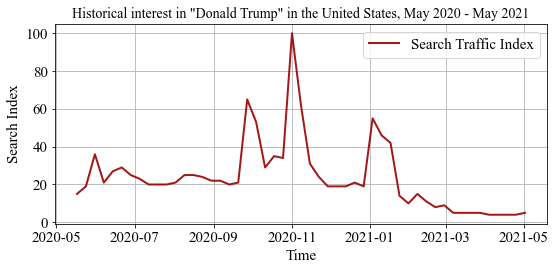

In [2]:
# Section III Donald Trump historical interest
donaldTrumpTopic = ["/m/0cqt90"]

trendFetcher.build_payload(donaldTrumpTopic,
                           timeframe = "today 12-m",
                           geo="US")
donaldTrumpInterest = trendFetcher.interest_over_time()
donaldTrumpInterest.drop(columns="isPartial", inplace=True)
donaldTrumpInterest.columns = ["Interest"]

x_values = list(list(donaldTrumpInterest.index))
y_values = list(donaldTrumpInterest["Interest"])

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_values,
        y_values,
        color=colors[0],
        alpha=0.9,
        label="Search Traffic Index",
        linewidth=2)

plt.title('Historical interest in "Donald Trump" in the United States, May 2020 - May 2021', fontsize=14)
plt.xlabel("Time")
plt.ylabel("Search Index")

plt.tight_layout()
plt.legend()
plt.grid(True)
        
# plt.xticks(x_values, labels=self.months, rotation="30")
# plt.yticks(y_values, labels=percentages, fontsize=14)

plt.show()

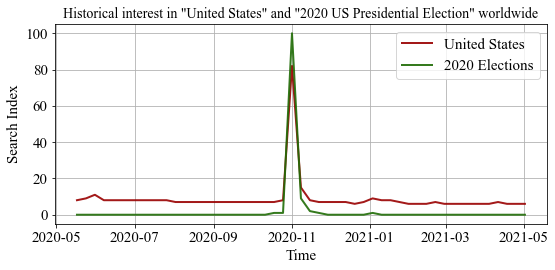

In [3]:
# Section V United States and 2020 US Presidential Election historical interest
topics = ["/m/09c7w0", "/g/11bwkdng8p"]

trendFetcher = TrendReq(hl='en-US', tz=360) # TrendReq needs to be reset if retrieving worldwide searches
trendFetcher.build_payload(topics,
                           timeframe = "today 12-m",
                           geo="")
topicsInterest = trendFetcher.interest_over_time()
topicsInterest.drop(columns="isPartial", inplace=True)
topicsInterest.columns = ["US", "Elections"]

x_values = list(list(topicsInterest.index))
y_values_us = list(topicsInterest["US"])
y_values_ele = list(topicsInterest["Elections"])

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_values,
        y_values_us,
        color=colors[0],
        alpha=0.9,
        label="United States",
        linewidth=2)

ax.plot(x_values,
        y_values_ele,
        color=colors[1],
        alpha=0.9,
        label="2020 Elections",
        linewidth=2)

plt.title('Historical interest in "United States" and "2020 US Presidential Election" worldwide', fontsize=14)
plt.xlabel("Time")
plt.ylabel("Search Index")

plt.tight_layout()
plt.legend()
plt.grid(True)

plt.show()

<ipython-input-4-78f26752dc22>:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
No handles with labels found to put in legend.


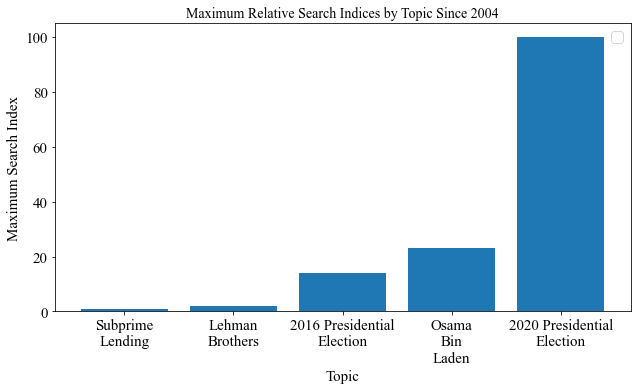

In [4]:
# Section V Bar Plot Great Historical American events

events = ["/m/02p_ydd", # Subprime lending 
          "/m/0jt5_vh", # Lehman Brothers
          "/m/0ncc_0w", # 2016 Presidential Election
          "/m/05mg9", # Osama Bin Laden
          "/g/11bwkdng8p"] # 2020 Presidential Election

trendFetcher = TrendReq(hl='en-US', tz=360) # TrendReq needs to be reset if retrieving worldwide searches
trendFetcher.build_payload(events,
                           timeframe = "all",
                           geo="")
eventsInterest = trendFetcher.interest_over_time()
eventsInterest.drop(columns="isPartial", inplace=True)
eventsInterest.columns = ["Subprime\nLending",
                          "Lehman\nBrothers",
                          "2016 Presidential\nElection",
                          "Osama\nBin\nLaden",
                          "2020 Presidential\nElection"]

max_values = [np.max(np.array(eventsInterest[col])) for col in eventsInterest.columns]

fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])

ax.bar(eventsInterest.columns,
       max_values)

plt.title('Maximum Relative Search Indices by Topic Since 2004', fontsize=14)
plt.xlabel("Topic")
plt.ylabel("Maximum Search Index")

plt.tight_layout()
plt.legend()
plt.grid(False)

plt.show()

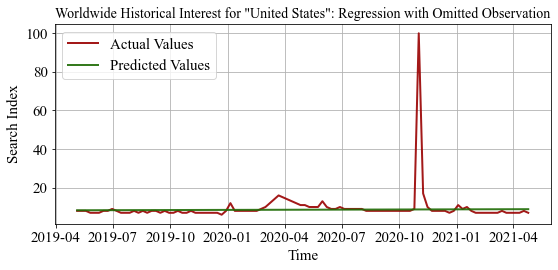

Residual = 91.2627365633124
Multiple = 11.445231189905751


In [5]:
# Section VI Worldwide Historical Interest Regression
usTopic = ["/m/09c7w0"]

trendFetcher = TrendReq(hl='en-US', tz=360) # TrendReq needs to be reset if retrieving worldwide searches
trendFetcher.build_payload(usTopic,
                           timeframe = "2019-05-01 2021-05-01",
                           geo="")
usTopicInterest = trendFetcher.interest_over_time()
usTopicInterest.drop(columns="isPartial", inplace=True)
usTopicInterest.columns = ["US"]

# for ind, val in enumerate(list(usTopicInterest["US"])):
#     print(f"{ind}: {val}") # ind=78

x_values = list(usTopicInterest.index)
y_values = list(usTopicInterest["US"])
# Fit the values in numpy to run the regression
x_values_rgr = np.array(range(len(x_values))).reshape((-1, 1))
y_values_rgr = np.array(y_values)

# The index of the observation to omit is 78
x_values_omit = np.array(list(range(78)) + list(range(79, len(x_values)))).reshape((-1, 1))
y_values_omit = y_values[:78] + y_values[(78+1):]
# Fit the "try" arrays
model = LinearRegression().fit(x_values_omit, 
                               y_values_omit)
# Get the predicted values for the complete array of the independent variable
pred_values = model.predict(x_values_rgr)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_values,
        y_values_rgr,
        color=colors[0],
        alpha=0.9,
        label="Actual Values",
        linewidth=2)

ax.plot(x_values,
        pred_values,
        color=colors[1],
        alpha=0.9,
        label="Predicted Values",
        linewidth=2)

plt.title('Worldwide Historical Interest for "United States": Regression with Omitted Observation', fontsize=14)
plt.xlabel("Time")
plt.ylabel("Search Index")

plt.tight_layout()
plt.legend()
plt.grid(True)

plt.show()

print("Residual = {}".format(y_values[78] - pred_values[78]))
print("Multiple = {}".format(y_values[78] / pred_values[78]))

<ipython-input-6-bda28c838efb>:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
No handles with labels found to put in legend.


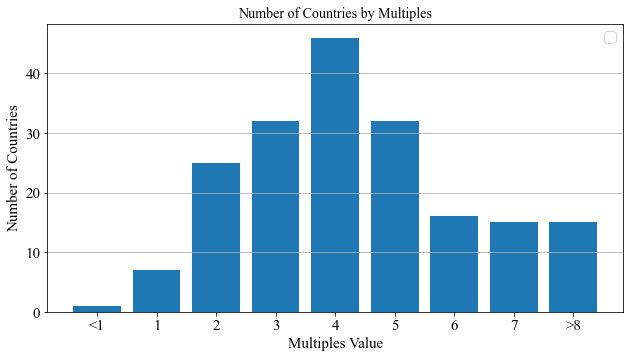

0.656084656084656


In [6]:
# Section VI Multiples distribution bar plot
countryTable = pd.read_csv("countryTable.csv")

if "Unnamed: 0" in countryTable.columns:
    countryTable.drop(columns=["Unnamed: 0"], inplace=True)

mult_cols = ["Country", "RES", "MULT"]

df_mults = countryTable.drop(columns=[col for col in countryTable.columns if col not in mult_cols])
df_mults.dropna(inplace=True)

residuals = np.array(df_mults["RES"])
multiples = np.array(df_mults["MULT"])

mult_buckets = []
for i in range(1, 10):
    if i < 9:
        mult_buckets.append(np.count_nonzero((multiples < i) & (multiples > i-1)))
    else:
        mult_buckets.append(np.count_nonzero(multiples > i-1))

bucket_labels = ["<1",
                 "1",
                 "2",
                 "3",
                 "4",
                 "5",
                 "6",
                 "7",
                 ">8"]

fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])

ax.bar(bucket_labels,
       mult_buckets)

plt.title('Number of Countries by Multiples', fontsize=14)
plt.xlabel("Multiples Value")
plt.ylabel("Number of Countries")

plt.tight_layout()
plt.legend()
plt.grid(True, axis='y')

plt.show()

print(np.sum(mult_buckets[4:]) / np.sum(mult_buckets))

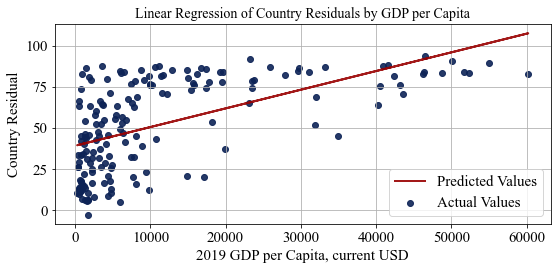

R Squared: 0.32799749360637376


In [7]:
# Section VI GDP per Capita Residual Regression
to_drop_rgr_2 = [col for col in countryTable.columns if col not in ["Country", "RES", "MULT", "GDPPCAP"]]
df_rgr_2 = countryTable.drop(columns=to_drop_rgr_2)
df_rgr_2.dropna(inplace=True)

filt = df_rgr_2["GDPPCAP"] < 62_000
df_rgr_2 = df_rgr_2[filt]

x_values = list(df_rgr_2["GDPPCAP"])
y_values = list(df_rgr_2["RES"])
labels = list(df_rgr_2["Country"])

x_values_rgr = np.array(x_values).reshape((-1, 1))
y_values_rgr = np.array(y_values)

model = LinearRegression().fit(x_values_rgr, 
                               y_values_rgr)

pred_values = model.predict(x_values_rgr)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()

ax.scatter(x_values,
           y_values,
           color=colors[2],
           alpha=0.9,
           label="Actual Values")

ax.plot(x_values,
        pred_values,
        color=colors[0],
        alpha=0.9,
        label="Predicted Values",
        linewidth=2)

plt.title('Linear Regression of Country Residuals by GDP per Capita', fontsize=14)
plt.xlabel("2019 GDP per Capita, current USD")
plt.ylabel("Country Residual")

plt.tight_layout()
ax.legend(markerscale=1)
plt.grid(True)

# for i, txt in enumerate(labels):
#     ax.annotate(txt, (x_values[i], y_values[i]))

plt.show()

print("R Squared: {}".format(model.score(x_values_rgr, 
                                         y_values_rgr)))

In [8]:
# Section VII Countries with peak interest in November 2020

master_df = pd.read_csv("master_us_un_df.csv", index_col="date")

november_date = "2020-11-01"
november_row = np.array(master_df.loc[november_date])

hundred_count = np.count_nonzero(november_row==100)
hundred_non_count = len(november_row) - hundred_count
hundred_share = hundred_count / len(november_row)

print(f"Count: {hundred_count}, Non: {hundred_non_count}, Share: {hundred_share}.")

Count: 78, Non: 114, Share: 0.40625.


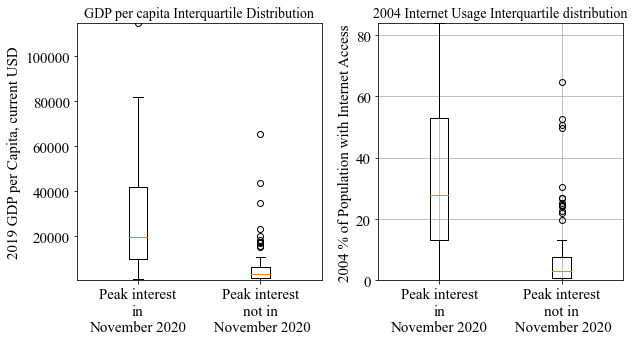

In [65]:
# Section VII Interquartile Distribution of GDP per capita for countries
# with November 2020 as peak interst compared to non
hundred_gdppc = []
non_gdppc = []
hundred_it = []
non_it = []

to_drop_hundred = [col for col in countryTable.columns if col not in ["Country", "2020_NOV_INT", "GDPPCAP"]]
hundred_df = countryTable.drop(columns=to_drop_hundred)
hundred_df.dropna(inplace=True)

to_drop_it = [col for col in countryTable.columns if col not in ["Country", "2020_NOV_INT", "2004_IT_USAGE"]]
IT_df = countryTable.drop(columns=to_drop_it)
IT_df.dropna(inplace=True)

for index, gdppcap in zip(hundred_df["2020_NOV_INT"], hundred_df["GDPPCAP"]):
    if index == 100:
        hundred_gdppc.append(gdppcap)
    else:
        non_gdppc.append(gdppcap)

for index, it in zip(IT_df["2020_NOV_INT"], IT_df["2004_IT_USAGE"]):
    if index == 100:
        hundred_it.append(it)
    else:
        non_it.append(it)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 5), sharey=False)

boxprops = dict(linestyle='-', linewidth=1, color="black")

axs[0].boxplot([hundred_gdppc, non_gdppc],
               boxprops=boxprops,
               labels=["Peak interest\nin\nNovember 2020",
                       "Peak interest\nnot in\n November 2020"])
axs[0].set_ylim(min(non_gdppc), max(hundred_gdppc))
axs[0].set_ylabel("2019 GDP per Capita, current USD")
axs[0].set_title('GDP per capita Interquartile Distribution', fontsize=14)

axs[1].boxplot([hundred_it, non_it],
               boxprops=boxprops,
               labels=["Peak interest\nin\nNovember 2020",
                       "Peak interest\nnot in\n November 2020"])
axs[1].set_ylim(min(non_it), max(hundred_it))
axs[1].set_ylabel("2004 % of Population with Internet Access")
axs[1].set_title('2004 Internet Usage Interquartile distribution', fontsize=14)


# selection = [[hundred_gdppc, non_gdppc],
#              [hundred_it, non_it]]
# labels = ["Peak interest\n in November 2020",
#           "Peak interest\n not in November 2020"]
# fig, ax = plt.subplots(1, len(selection), figsize=(10, len(selection)))

# for i, sel in enumerate(selection):
#     axo = df[col].plot(kind='box', ax=ax[i], showfliers=False, grid=True)
#     axo.set_ylim(df[col].min(), df[col].max())
#     axo.set_ylabel(col + ' / Unit')
#     i += 1

plt.tight_layout()
# ax.legend(markerscale=1)
plt.grid(True)

# for i, txt in enumerate(labels):
#     ax.annotate(txt, (x_values[i], y_values[i]))

plt.show()

In [26]:
# Section VII Countries whose interest didn't peak in November 2020, whether 
# their interest peaked before 2010
outliers = []

for col in master_df.columns:
    date = master_df.index[master_df[col]==100][0]
    if int(str(date)[:4]) < 2010:
        outliers.append(col)

print(len(outliers))

108


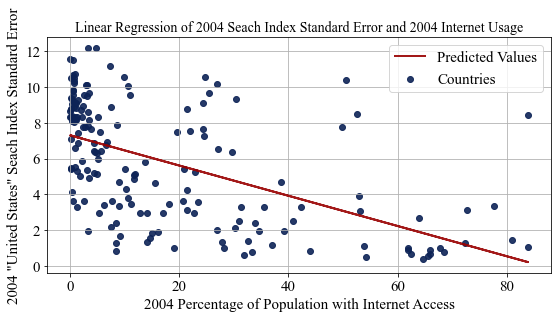

R Squared: 0.3093573576826958


In [68]:
# Section VII Linear Regression, internet usage and standard error of 2004 search traffic
# Section VI GDP per Capita Residual Regression
to_drop_rgr_3 = [col for col in countryTable.columns if col not in ["2004_Sigma", "2004_IT_USAGE", "2004_POP"]]
df_rgr_3 = countryTable.drop(columns=to_drop_rgr_3)
df_rgr_3.dropna(inplace=True)

# The following filter eliminates countries with large populations, and 
filt = (df_rgr_3["2004_POP"] < 224_000_000) & (df_rgr_3["2004_Sigma"] > 0)
df_rgr_3 = df_rgr_3[filt]

x_values = list(df_rgr_3["2004_IT_USAGE"])
y_values = list(df_rgr_3["2004_Sigma"])
# labels = list(df_rgr_2["Country"])

x_values_rgr = np.array(x_values).reshape((-1, 1))
y_values_rgr = np.array(y_values)

model = LinearRegression().fit(x_values_rgr, 
                               y_values_rgr)

pred_values = model.predict(x_values_rgr)

fig = plt.figure(figsize=(8, 4.5))
ax = fig.add_subplot()

ax.scatter(x_values,
           y_values,
           color=colors[2],
           alpha=0.9,
           label="Countries")

ax.plot(x_values,
        pred_values,
        color=colors[0],
        alpha=0.9,
        label="Predicted Values",
        linewidth=2)

plt.title('Linear Regression of 2004 Seach Index Standard Error and 2004 Internet Usage', fontsize=14)
plt.xlabel("2004 Percentage of Population with Internet Access")
plt.ylabel('2004 "United States" Seach Index Standard Error')

plt.tight_layout()
ax.legend(markerscale=1)
plt.grid(True)

# for i, txt in enumerate(labels):
#     ax.annotate(txt, (x_values[i], y_values[i]))

plt.show()

print("R Squared: {}".format(model.score(x_values_rgr, 
                                         y_values_rgr)))

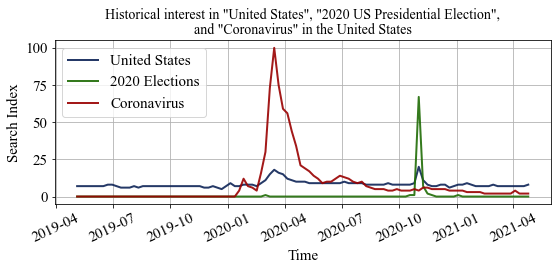

In [73]:
# Section VII United States, 2020 US Election, and Coronavirus historical interest
topics = ["/m/09c7w0", # United States
          "/g/11bwkdng8p", # 2020 Elections
          "/m/01cpyy"] # Coronavirus

trendFetcher = TrendReq(hl='en-US', tz=360) # TrendReq needs to be reset if retrieving worldwide searches
trendFetcher.build_payload(topics,
                           timeframe = "2019-05-01 2021-05-01",
                           geo="US")
topicsInterest = trendFetcher.interest_over_time()
topicsInterest.drop(columns="isPartial", inplace=True)
topicsInterest.columns = ["US", "Elections", "Coronavirus"]

x_values = list(list(topicsInterest.index))
y_values_us = list(topicsInterest["US"])
y_values_ele = list(topicsInterest["Elections"])
y_values_rona = list(topicsInterest["Coronavirus"])

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_values,
        y_values_us,
        color=colors[2],
        alpha=0.9,
        label="United States",
        linewidth=2)

ax.plot(x_values,
        y_values_ele,
        color=colors[1],
        alpha=0.9,
        label="2020 Elections",
        linewidth=2)

ax.plot(x_values,
        y_values_rona,
        color=colors[0],
        alpha=0.9,
        label="Coronavirus",
        linewidth=2)

plt.title('Historical interest in "United States", "2020 US Presidential Election",\nand "Coronavirus" in the United States', fontsize=14)
plt.xlabel("Time")
plt.xticks(rotation="25")
plt.ylabel("Search Index")

plt.tight_layout()
plt.legend()
plt.grid(True)

plt.show()

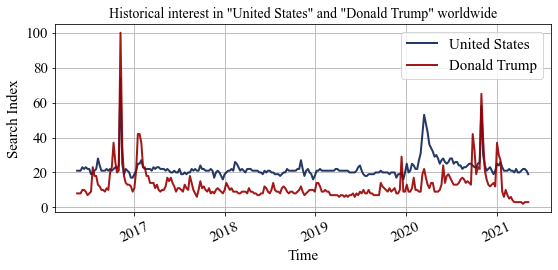

In [74]:
# Section VIII United States and Donald Trump Historical Interest
topics = ["/m/09c7w0", # United States
          "/m/0cqt90"] # Trump

trendFetcher = TrendReq(hl='en-US', tz=360) 
trendFetcher.build_payload(topics,
                           timeframe = "today 5-y",
                           geo="US")
topicsInterest = trendFetcher.interest_over_time()
topicsInterest.drop(columns="isPartial", inplace=True)
topicsInterest.columns = ["US", "Trump"]

x_values = list(list(topicsInterest.index))
y_values_us = list(topicsInterest["US"])
y_values_ele = list(topicsInterest["Trump"])

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_values,
        y_values_us,
        color=colors[2],
        alpha=0.9,
        label="United States",
        linewidth=2)

ax.plot(x_values,
        y_values_ele,
        color=colors[0],
        alpha=0.9,
        label="Donald Trump",
        linewidth=2)

plt.title('Historical interest in "United States" and "Donald Trump" worldwide', fontsize=14)
plt.xlabel("Time")
plt.xticks(rotation="25")
plt.ylabel("Search Index")

plt.tight_layout()
plt.legend()
plt.grid(True)

plt.show()

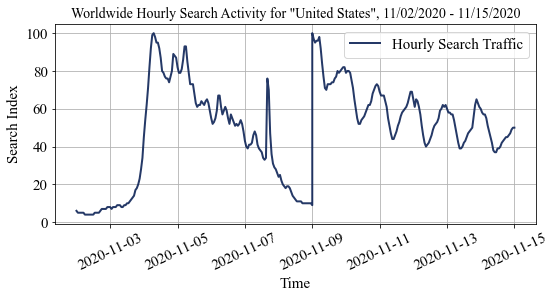

In [86]:
# Section VIII Hourly Interest Plotted

hourly_df = pd.read_csv("hourly_worldwide_us.csv", index_col="date")

x_values = []

for date in hourly_df.index:
    lst = str(date).split(" ")
    ymd = lst[0].split("-")
    hr = int(lst[1].split(":")[0])

    x_values.append(datetime.datetime(year=int(ymd[0]),
                                      month=int(ymd[1]),
                                      day=int(ymd[2]),
                                      hour=hr))

y_values = hourly_df["2020"]

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x_values,
        y_values,
        color=colors[2],
        alpha=0.9,
        label="Hourly Search Traffic",
        linewidth=2)

plt.title('Worldwide Hourly Search Activity for "United States", 11/02/2020 - 11/15/2020', fontsize=14)
plt.xlabel("Time")
plt.ylabel("Search Index")

plt.tight_layout()
plt.legend()
plt.grid(True)
        
plt.xticks(rotation="25")
# plt.yticks(y_values, labels=percentages, fontsize=14)

plt.show()